In [17]:
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("data.csv")

In [20]:
ls


ANN.ipynb  data.csv


In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
import numpy as np

In [25]:
# df

In [26]:
# df['Out'] = np.where(df['Outcome'] == 1, "Diabetic", "Non-Diabetic")

In [27]:
# import seaborn as sns
# sns.pairplot(df,hue='Out')

In [31]:
X = df.drop('Outcome',axis = 1)
Y = df['Outcome']

In [32]:
# Converting into Number values for the model execution

X = X.values
Y = Y.values

In [98]:
#Splitting the data

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [40]:
#Creating Tensors

In [99]:
#Libraries used for PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [42]:
#For InDependent
# We willl use Float Type tensors for independent
X_train = torch.FloatTensor(X_train)
X_test  = torch.FloatTensor(X_test)

#For Dependent
# We can use Long Tensor for dependent
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [44]:
df.shape

(768, 9)

In [51]:
##Creating ANN Model from Scratch

# First Layer has 8
#  then 20
#  then 20
#  and the final layer holds 2 ( for classifying in if a person has diabetes or not )


class Ann_Model(nn.Module):
    def __init__(self,input_features=8,hidden1 = 20, hidden2 = 20, out_features = 2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [52]:
##Call the class using Instance of the class 

torch.manual_seed(20)
model = Ann_Model()

In [53]:
#Summary of the model

model.parameters

<bound method Module.parameters of Ann_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [70]:
## Backward Propogation 
# We have used Cross Entropy loss for computing loss

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [71]:
# performing the model of 500 epochs and computing and printing loss for each 10 epochs

epochs = 500
final_loss = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, Y_train)
    final_loss.append(loss)
    if i%10 == 0:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 0 and the loss : 0.2933169901371002
Epoch number: 10 and the loss : 1.4205479621887207
Epoch number: 20 and the loss : 0.8060475587844849
Epoch number: 30 and the loss : 0.5799104571342468
Epoch number: 40 and the loss : 0.4781233072280884
Epoch number: 50 and the loss : 0.4423750936985016
Epoch number: 60 and the loss : 0.4141232967376709
Epoch number: 70 and the loss : 0.39835405349731445
Epoch number: 80 and the loss : 0.3858738839626312
Epoch number: 90 and the loss : 0.372916042804718
Epoch number: 100 and the loss : 0.3586512506008148
Epoch number: 110 and the loss : 0.34957900643348694
Epoch number: 120 and the loss : 0.343566358089447
Epoch number: 130 and the loss : 0.33867543935775757
Epoch number: 140 and the loss : 0.33453208208084106
Epoch number: 150 and the loss : 0.33118095993995667
Epoch number: 160 and the loss : 0.32821086049079895
Epoch number: 170 and the loss : 0.32532668113708496
Epoch number: 180 and the loss : 0.32254499197006226
Epoch number: 190

In [72]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Epoch')

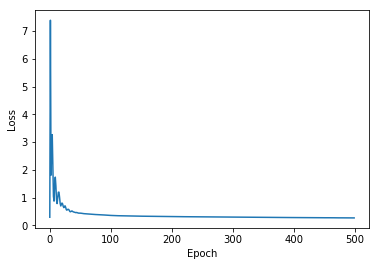

In [73]:
plt.plot(range(epochs),final_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [76]:
#Predicting : 

predictions = []

with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
0
1
1
0
1
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
1
0
1
0
0
0
1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0


In [ ]:
# Confusion Matrix 

In [78]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,predictions)
cm

array([[86, 21],
       [18, 29]])

Text(69.0, 0.5, 'Predicted Values')

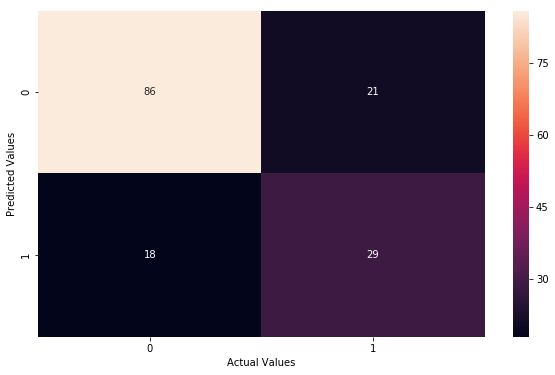

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# 86 and 29 true,
# 18 and 21 false

In [ ]:
# Accuracy Score

In [83]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,predictions)
score

0.7467532467532467

In [85]:
#Saving the model

# Extension for the model is 'pt'

In [84]:
torch.save(model,"Diabetes.pt")

In [ ]:
#loading the Model

In [86]:
model = torch.load("Diabetes.pt")

In [87]:
model.eval()

Ann_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [ ]:
#For predicting, we first need to convert to a tensor and then use it.

In [92]:
#Prediction using INPUT VALUES

l1 = list(df.iloc[0,:-1])

In [93]:
l1

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [101]:
new_data=torch.tensor(l1)

#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    y = model(new_data).argmax().item()
    print(y)
    if(y == 1):
        print("Diabetes")
    else:
        print("Not Diabatic")
    


tensor([-0.2546,  2.4880])
1
Diabetes
